# Exercise 6-1: Support Vector Machines

In this exercise, we will be experimenting support vector machines (SVMs) on various example 2D datasets.

## Part 1: Loading and Visualizing Data

Load and visualizing the data from `ex6data1.mat`:

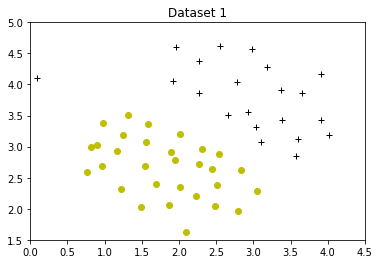

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data


# Load from ex6data1
mat_data = sio.loadmat('../data/ex6data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

In [13]:
print(mat_data['y'].shape)

(51, 1)


In [14]:
print(mat_data['y'].ravel().shape)


(51,)


## Part 2: Training Linear SVM 

In `ex6data1.mat`, most of the positive and negative examples can be seperated by a single line. Train SVM with linear kernel with C = 1 and plot the decision boundary:

score: 0.9803921568627451


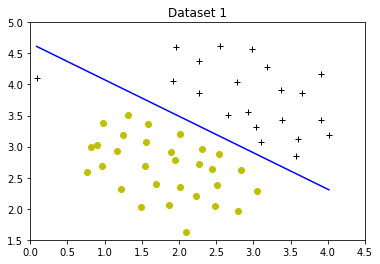

In [2]:
from sklearn import svm

from visualize_boundary_linear import visualize_boundary_linear


# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 1
clf = svm.LinearSVC(C=C)
clf.fit(X, y)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])  
plt.title("Dataset 1")
plt.show()

## Part 4: Visualizing Dataset 2

Load and visualizing the data from `ex6data2.mat`:

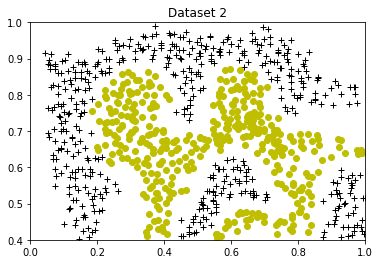

In [3]:
# Load from ex6data2
mat_data = sio.loadmat('../data/ex6data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 5: Training SVM with RBF Kernel (Dataset 2)

In `ex6data2.mat`, there is no linear decision boundary that separates the positive and negative examples. Train SVM with Gaussian kernel to learn a non-linear decision boundary and plot the decision boundary:

score: 0.9895712630359212
z:\Data_Science\TheBridge\Content\Contenido_Curso\data_science_apr_2021\week9_ML_svm_poly_norm\day3_cicd_encoding_metrics_knn_svm_nlr\svm\theory\visualize_boundary.py:29: UserWarning: No contour levels were found within the data range.
  plt.contour(X1, X2, vals, levels=[0])


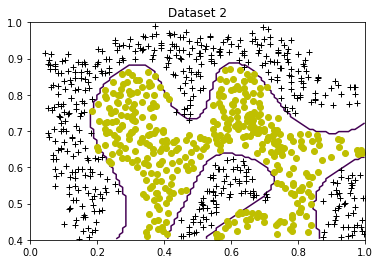

In [8]:
from visualize_boundary import visualize_boundary


# SVM Parameters
C = 1000
gamma = 10

# rbf -- Radial basis function
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 6: Visualizing Dataset 3 

Load and visualizing the data from `ex6data3.mat`:

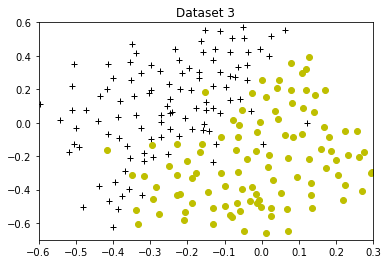

In [9]:
# Load from ex6data3
mat_data = sio.loadmat('../data/ex6data3.mat')
X = mat_data['X']
y = mat_data['y'].ravel()
X_val = mat_data['Xval']
y_val = mat_data['yval'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title("Dataset 3")
plt.show()

## Part 7: Training SVM with RBF Kernel (Dataset 3)

Este ejemplo es solo a nivel lectivo. Más adelante veremos la mejor práctica para encontrar los parámetros.

To find the best parameters for SVM, the `data3_params()` trys differernt combination of C and gamma and returns the best choice of them for SVM with RBF kernel.

In [10]:
def data3_params(X, y, X_val, y_val):
    """
    Returns the best choice of C and gamma for SVM with RBF kernel.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels for training set.
    X_val : ndarray, shape (n_val_samples, n_features)
        Cross validation samples, where n_val_samples is the number of cross validation samples and n_features is the
        number of features.
    y_val : ndarray, shape (n_val_samples,)
        Labels for cross validation set.

    Returns
    -------
    C : float
        The best choice of penalty parameter C of the error term.
    gamma : float
        The best choice of kernel coefficient for 'rbf'.
    """
    C_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 1000, 100]
    gamma_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    max_score = -1
    C_pick = -1
    gamma_pick = -1
    for C in C_cands:
        for gamma in gamma_cands:
            clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
            clf.fit(X, y)
            score = clf.score(X_val, y_val)
            if score > max_score:
                max_score = score
                C_pick = C
                gamma_pick = gamma

    return C_pick, gamma_pick

Train SVM and plot the decision boundary:

C 3
gamma 30
score: 0.965
z:\Data_Science\TheBridge\Content\Contenido_Curso\data_science_apr_2021\week9_ML_svm_poly_norm\day3_cicd_encoding_metrics_knn_svm_nlr\svm\theory\visualize_boundary.py:29: UserWarning: No contour levels were found within the data range.
  plt.contour(X1, X2, vals, levels=[0])


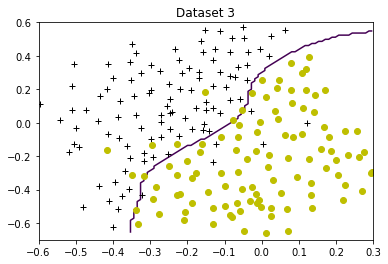

In [11]:
C, gamma = data3_params(X, y, X_val, y_val)
print("C", C)
print("gamma", gamma)
# Train the SVM
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
print ('score:', clf.score(X_val, y_val))

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title("Dataset 3")
plt.show()